**Assignment 1** :
  Classifying Handwritting digits 

# Loading and Preparing the data

In [ ]:
#Import Libraries
import tensorflow as tf
from tensorflow import keras 

In [ ]:
# Loading MNIST dataset
mnist = keras.datasets.mnist 
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
# Data Exploration
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
# X_train is flattened to change the dimension
RESHAPED = 784 # 28x28 = 784 neurons
X_train = X_train.reshape(60000, RESHAPED) 
X_test = X_test.reshape(10000, RESHAPED) 

# Convert data type to float 
X_train = X_train.astype('float32')
X_test = X_test.astype('float32') 

# Normalizing the input to be within the range [0,1]
X_train /= 255
#intensity of each pixel is divided by 255, the maximum intensity value
X_test /= 255
print(X_train.shape[0], 'train samples') 
print(X_test.shape[0], 'test samples') 

# One-hot representation of the labels.
Y_train = tf.keras.utils.to_categorical(Y_train, 10) # 10 is the number of unique label
Y_test = tf.keras.utils.to_categorical(Y_test, 10)


60000 train samples
10000 test samples


#**Designing the model**

Model 0: Single Layer Perceptron

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential

#No hidden layer
model_0 = keras.models.Sequential()

# Input arrays of shape (*, 784)
model_0.add(keras.layers.Dense(10, activation='softmax')) 

# Compiling the model.
model_0.compile(optimizer='SGD', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
# Training the model. 
training = model_0.fit(X_train, Y_train, batch_size=64, epochs=70, validation_split=0.2) 

Epoch 1/70
750/750 [==============================] - 2s 2ms/step - loss: 1.0642 - accuracy: 0.7546 - val_loss: 0.6510 - val_accuracy: 0.8598
Epoch 2/70
750/750 [==============================] - 2s 2ms/step - loss: 0.6045 - accuracy: 0.8560 - val_loss: 0.5060 - val_accuracy: 0.8782
Epoch 3/70
750/750 [==============================] - 2s 2ms/step - loss: 0.5106 - accuracy: 0.8711 - val_loss: 0.4488 - val_accuracy: 0.8866
Epoch 4/70
750/750 [==============================] - 2s 2ms/step - loss: 0.4649 - accuracy: 0.8788 - val_loss: 0.4169 - val_accuracy: 0.8928
Epoch 5/70
750/750 [==============================] - 2s 2ms/step - loss: 0.4367 - accuracy: 0.8846 - val_loss: 0.3959 - val_accuracy: 0.8956
Epoch 6/70
750/750 [==============================] - 2s 2ms/step - loss: 0.4171 - accuracy: 0.8880 - val_loss: 0.3810 - val_accuracy: 0.8988
Epoch 7/70
750/750 [==============================] - 2s 2ms/step - loss: 0.4024 - accuracy: 0.8916 - val_loss: 0.3697 - val_accuracy: 0.9009
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


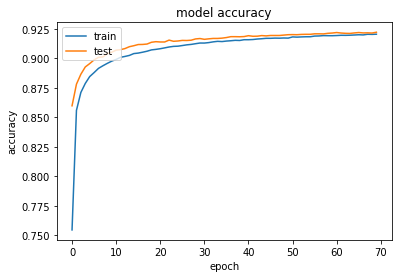

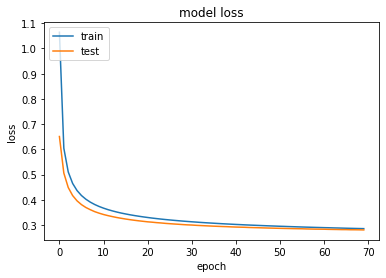

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#evaluate the model
test_loss, test_acc = model_0.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.2827 - accuracy: 0.9223
Test accuracy: 0.9222999811172485




.

Model 1 : Multi Layer Perceptron

In [ ]:
# Building model with 2 hidden layers
from tensorflow.keras.layers import Dropout

model_1 = keras.models.Sequential()
model_1.add(keras.layers.Dense(200, activation='relu'))
model_1.add(Dropout(0.3))

model_1.add(keras.layers.Dense(100, activation='relu')) 
model_1.add(Dropout(0.3))

model_1.add(keras.layers.Dense(10, activation='softmax'))  

# Compiling the model.
model_1.compile(optimizer='SGD', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Training the model. 
training2 = model_1.fit(X_train, Y_train, batch_size=64, epochs=100, validation_split=0.2) 

Epoch 1/100
750/750 [==============================] - 4s 5ms/step - loss: 1.2548 - accuracy: 0.6054 - val_loss: 0.4979 - val_accuracy: 0.8779
Epoch 2/100
750/750 [==============================] - 4s 5ms/step - loss: 0.6085 - accuracy: 0.8170 - val_loss: 0.3469 - val_accuracy: 0.9081
Epoch 3/100
750/750 [==============================] - 4s 5ms/step - loss: 0.4843 - accuracy: 0.8570 - val_loss: 0.2953 - val_accuracy: 0.9180
Epoch 4/100
750/750 [==============================] - 4s 5ms/step - loss: 0.4187 - accuracy: 0.8748 - val_loss: 0.2657 - val_accuracy: 0.9252
Epoch 5/100
750/750 [==============================] - 4s 5ms/step - loss: 0.3785 - accuracy: 0.8890 - val_loss: 0.2433 - val_accuracy: 0.9297
Epoch 6/100
750/750 [==============================] - 4s 5ms/step - loss: 0.3477 - accuracy: 0.8979 - val_loss: 0.2266 - val_accuracy: 0.9338
Epoch 7/100
750/750 [==============================] - 4s 5ms/step - loss: 0.3207 - accuracy: 0.9050 - val_loss: 0.2142 - val_accuracy: 0.9370

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


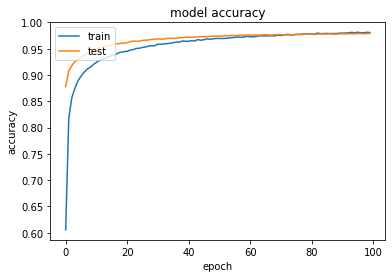

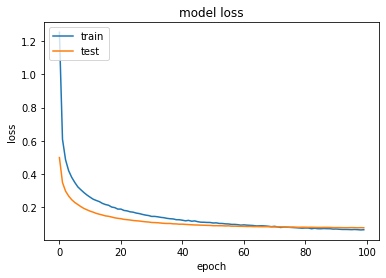

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training2.history.keys())
# summarize training for accuracy
plt.plot(training2.history['accuracy'])
plt.plot(training2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training2.history['loss'])
plt.plot(training2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#evaluate the model
test_loss, test_acc = model_1.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0672 - accuracy: 0.9800
Test accuracy: 0.9800000190734863
